# This script is used for general purpose data handling with Delft3D data source

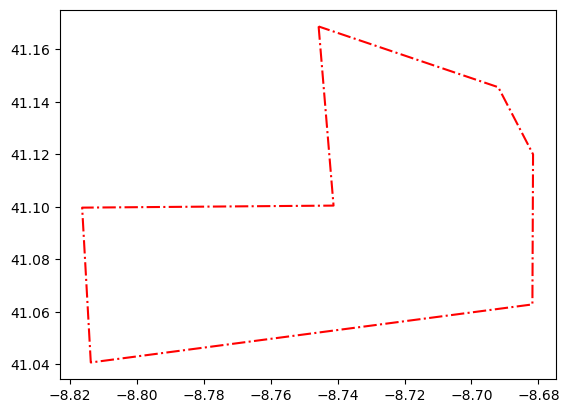

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import cuda
import pandas as pd
import plotly
import plotly.graph_objects as go
import time
from matplotlib.cm import get_cmap
from scipy.spatial.distance import cdist
from WGS import WGS
import os
from datetime import datetime
import concurrent.futures
from shapely.geometry import Polygon, Point
from tqdm import tqdm
from joblib import Parallel, delayed
from matplotlib.gridspec import GridSpec
import pickle
# from skgstat import Variogram
from scipy.interpolate import interp2d
import fast_interp
# from fast_interp import interp2d

def vectorize(v):
    return np.array(v).reshape(-1, 1)

# s1: load operation area
plg_op = pd.read_csv("OP2/OPA_GOOGLE.csv").to_numpy()
plg_op_shapely = Polygon(plg_op)
def is_point_legal(lat, lon):
    point = Point(lat, lon)
    return plg_op_shapely.contains(point)

plt.plot(plg_op[:, 1], plg_op[:, 0], 'r-.')


## Data interpolation for OP2 Long-horizon

In [10]:
# s2: load file
datapath = "raw/March/"
files = os.listdir(datapath)
files.sort()
file = files[0]
df = h5py.File(datapath+file, 'r')

# s3: get lat,lon
t1 = time.time()
data = df.get('data')
lon = np.array(data.get("X")).squeeze()[0, :, :].flatten()
lat = np.array(data.get("Y")).squeeze()[0, :, :].flatten()
t2 = time.time()
print("Loading time takes: ", t2 - t1)

# s4: get indices of legal locations
t1 = time.time()
res = Parallel(n_jobs=14)(delayed(is_point_legal)(la, lo) for la, lo in zip(lat, lon))
ind_legal = np.where(res)[0]
t2 = time.time()
print("Finished, time consumed: ", t2 - t1)


Loading time takes:  0.058187007904052734
Finished, time consumed:  0.910233736038208


In [4]:
indpath = "indices/March/"
files_ind = os.listdir(indpath)
dataset = {"lat": lat[ind_legal], "lon": lon[ind_legal], "North": {}, "East": {}, "South": {}, "West": {}}

def get_prior(filename): 
#     print("Load data")
    df_data = h5py.File(datapath + filename, 'r')
    data = df_data.get('data')
    sal_data = np.array(data["Val"])

#     print("Load ebb")
    iid = files_ind.index("F_"+filename[-14:-8]+".csv")
    df_ind = pd.read_csv(indpath + files_ind[iid])
    ind_ebb = np.where(df_ind["tide"] == "Ebb")[0]
    
#     print("appen dataset")
    for id_ebb in ind_ebb: 
        print(id_ebb)
        wd = df_ind["wind_direction"][id_ebb]
        wl = df_ind["wind_level"][id_ebb]
        print(wd, wl)
        sal_temp = sal_data[0, :, :, id_ebb].flatten()[ind_legal]
        dataset[wd].setdefault(wl, []).append(sal_temp)

#     return dataset


In [11]:

for file in tqdm(files): 
    print(file)
    get_prior(file)

# Parallel(n_jobs=12)(delayed(get_prior)(file) for file in files)


# dataset
# print(df_ind)
# print(df_ind["wind_direction"])
# print(df_ind["wind_level"])

# ind_ebb = np.where(df_ind["tide"] == "Ebb")[0]

# for index in ind_ebb: 
#     wd = df_ind["wind_direction"][index]
#     wl = df_ind["wind_level"][index]
#     sal_temp = sal_data[0, :, :, index].flatten()[ind_legal]
#     break
# iid = files_ind.index("F_"+file[-14:-8]+".csv")
# df_ind = pd.read_csv(files_ind[iid])

# np.where(df_ind["tide"] == "Ebb")[0]

  0%|                                                                                                            | 0/12 [00:00<?, ?it/s]

salinity_mar_2016_1-009.mat


  8%|████████▎                                                                                           | 1/12 [00:23<04:23, 23.97s/it]

salinity_mar_2016_2-008.mat


 17%|████████████████▋                                                                                   | 2/12 [00:48<04:03, 24.33s/it]

salinity_mar_2016_3-011.mat


 25%|█████████████████████████                                                                           | 3/12 [01:17<03:58, 26.55s/it]

salinity_mar_2017_1-002.mat


 33%|█████████████████████████████████▎                                                                  | 4/12 [01:40<03:19, 24.88s/it]

salinity_mar_2017_2-010.mat


 42%|█████████████████████████████████████████▋                                                          | 5/12 [02:04<02:53, 24.81s/it]

salinity_mar_2017_3-007.mat


 50%|██████████████████████████████████████████████████                                                  | 6/12 [02:31<02:32, 25.47s/it]

salinity_mar_2018_1-004.mat


 58%|██████████████████████████████████████████████████████████▎                                         | 7/12 [02:55<02:04, 24.96s/it]

salinity_mar_2018_2-012.mat


 67%|██████████████████████████████████████████████████████████████████▋                                 | 8/12 [03:19<01:38, 24.61s/it]

salinity_mar_2018_3-006.mat


 75%|███████████████████████████████████████████████████████████████████████████                         | 9/12 [03:48<01:17, 26.00s/it]

salinity_mar_2019_1-001.mat
0
North Moderate
1
North Heavy
2
North Heavy
3
North Heavy
4
North Heavy
5
North Heavy
6
North Heavy
7
North Heavy
8
North Heavy
9
North Heavy
10
North Heavy
11
North Heavy
12
North Heavy
13
North Moderate
14
North Moderate
15
North Moderate
16
North Moderate
17
North Moderate
18
North Moderate
19
North Moderate
20
North Moderate
21
North Moderate
22
North Moderate
23
North Moderate
24
North Moderate
25
West Moderate
26
West Moderate
27
West Moderate
28
West Moderate
29
West Moderate
30
West Moderate
31
North Moderate
32
North Moderate
33
North Moderate
34
North Moderate
35
North Moderate
36
North Moderate
37
West Moderate
38
West Moderate
39
West Moderate
40
West Moderate
41
West Moderate
42
West Moderate
43
West Moderate
44
West Moderate
45
West Moderate
46
West Moderate
47
West Moderate
48
West Moderate
49
North Moderate
50
North Moderate
51
North Moderate
52
North Moderate
53
North Moderate
54
North Moderate
55
North Mild
56
North Mild
57
North Mild
58
N

 83%|██████████████████████████████████████████████████████████████████████████████████▌                | 10/12 [04:11<00:50, 25.20s/it]

salinity_mar_2019_2-005.mat
0
North Heavy
1
North Heavy
2
North Heavy
3
North Heavy
4
North Heavy
5
North Heavy
6
North Heavy
7
North Heavy
8
North Heavy
9
North Heavy
10
North Heavy
11
North Heavy
12
North Heavy
13
North Heavy
14
North Heavy
15
North Heavy
16
North Heavy
17
North Heavy
18
North Heavy
19
North Moderate
20
North Moderate
21
North Moderate
22
North Moderate
23
North Moderate
24
North Moderate
25
North Heavy
26
North Heavy
27
North Heavy
28
North Heavy
29
North Heavy
30
North Heavy
31
North Heavy
32
North Heavy
33
North Heavy
34
North Heavy
35
North Heavy
36
North Heavy
37
North Heavy
38
North Heavy
39
North Heavy
40
North Heavy
41
North Heavy
42
North Heavy
43
North Moderate
44
North Moderate
45
North Moderate
46
North Moderate
47
North Moderate
48
North Moderate
49
North Moderate
50
North Moderate
51
North Moderate
52
North Moderate
53
North Moderate
54
North Moderate
55
North Moderate
56
North Moderate
57
North Moderate
58
North Moderate
59
North Moderate
60
North Mode

 92%|██████████████████████████████████████████████████████████████████████████████████████████▊        | 11/12 [04:35<00:24, 24.68s/it]

salinity_mar_2019_3-003.mat
0
North Moderate
1
East Moderate
2
East Moderate
3
East Moderate
4
East Moderate
5
East Moderate
6
East Moderate
7
East Heavy
8
East Heavy
9
East Heavy
10
East Heavy
11
East Heavy
12
East Heavy
13
East Moderate
14
East Moderate
15
East Moderate
16
East Moderate
17
East Moderate
18
East Moderate
19
East Moderate
20
East Moderate
21
East Moderate
22
East Moderate
23
East Moderate
24
East Moderate
25
West Mild
26
West Mild
27
West Mild
28
West Mild
29
West Mild
30
West Mild
31
North Moderate
32
North Moderate
33
North Moderate
34
North Moderate
35
North Moderate
36
North Moderate
37
North Moderate
38
North Moderate
39
North Moderate
40
North Moderate
41
North Moderate
42
North Moderate
43
East Moderate
44
East Moderate
45
East Moderate
46
East Moderate
47
East Moderate
48
East Moderate
49
East Mild
50
East Mild
51
East Mild
52
East Mild
53
East Mild
54
East Mild
55
East Mild
56
East Mild
57
East Mild
58
East Mild
59
East Mild
60
East Mild
61
East Mild
62
East M

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [05:03<00:00, 25.32s/it]

497
North Moderate
498
North Moderate
499
North Moderate
500
North Moderate
501
North Moderate
502
North Moderate
503
North Moderate
504
North Moderate
505
North Moderate
506
North Moderate
507
North Moderate
508
North Moderate
509
North Moderate
510
North Moderate
511
North Moderate
512
North Moderate
513
North Moderate
514
North Moderate
515
North Moderate
516
North Moderate
517
North Moderate
518
North Moderate
519
North Moderate
520
North Moderate
521
North Moderate
522
North Moderate
523
North Moderate
524
North Moderate
525
North Moderate
526
North Moderate
527
North Moderate
528
North Moderate


{}

In [13]:
# save to file
a = dataset
with open('march_prior.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('march_prior.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [12]:
dataset

{'lat': array([41.04277681, 41.04314957, 41.0435155 , ..., 41.16690625,
        41.16791911, 41.1678613 ]),
 'lon': array([-8.8139366 , -8.81134544, -8.80879876, ..., -8.74187701,
        -8.74534782, -8.74414367]),
 'North': {'Moderate': [array([22.15893745, 21.81618309, 21.70764732, ..., 33.09505844,
          33.09979248, 33.10144043]),
   array([31.37641525, 31.62516022, 31.75255394, ..., 34.4445343 ,
          34.43959808, 34.44300842]),
   array([31.80071259, 31.99194336, 32.088974  , ..., 34.48748779,
          34.48361206, 34.48664093]),
   array([32.12644577, 32.27156067, 32.34745026, ..., 34.52709198,
          34.52426147, 34.52690506]),
   array([32.37742615, 32.49174118, 32.55393219, ..., 34.5634079 ,
          34.56164169, 34.56388855]),
   array([32.57865906, 32.67406464, 32.7286644 , ..., 34.59660339,
          34.5959816 , 34.5978241 ]),
   array([32.74764633, 32.8328476 , 32.88236618, ..., 34.62697983,
          34.62770462, 34.62911224]),
   array([32.88960648, 32.97

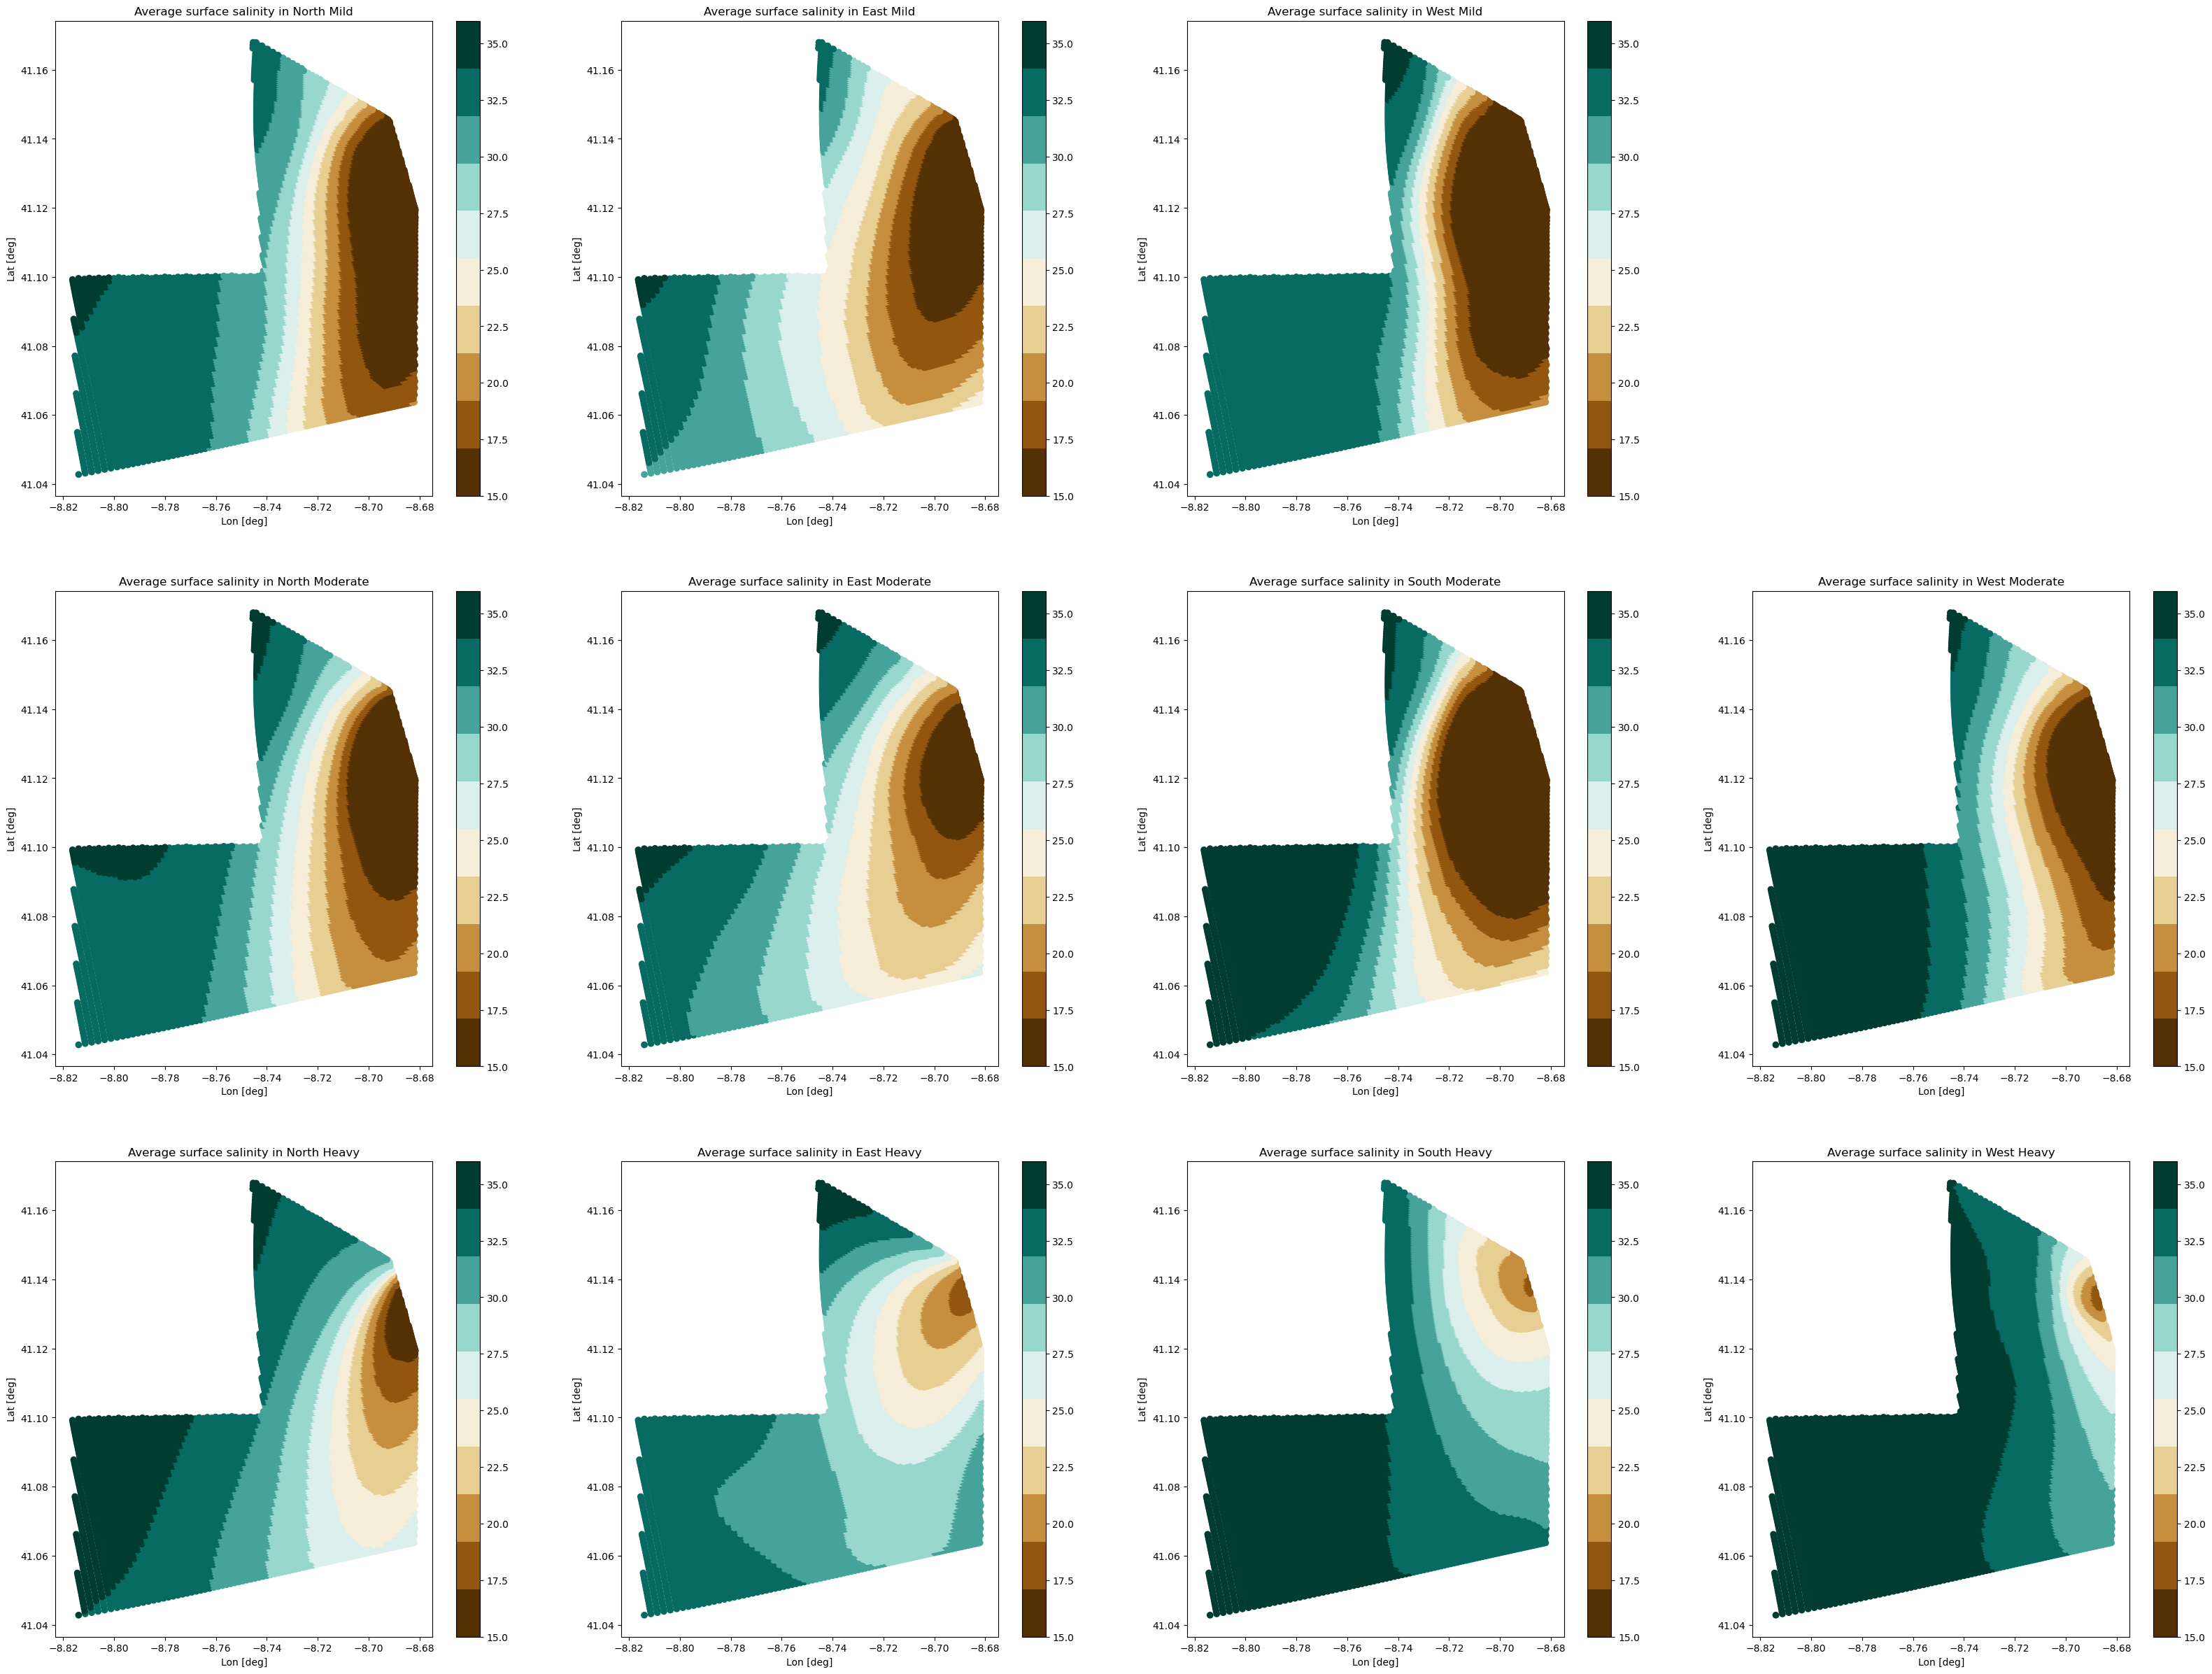

In [15]:
# sal_int = sal_data[0, :, :, 0].flatten()[ind_legal]
lon_int = lon[ind_legal]
lat_int = lat[ind_legal]

fig = plt.figure(figsize=(40, 30))
gs = GridSpec(nrows=3, ncols=4)

cnt_row = 0
for levels in ["Mild", "Moderate", "Heavy"]:
    cnt_col = 0
    for dirs in ["North", "East", "South", "West"]:
#         print(cnt_row, cnt_col)
        try: 
            st = np.array(dataset[dirs][levels])

            ax = fig.add_subplot(gs[cnt_row, cnt_col])
            im = ax.scatter(lon_int, lat_int, c=np.mean(st, axis=0), cmap=get_cmap("BrBG", 10), vmin=15, vmax=36)
            plt.colorbar(im)
            ax.set_title("Average surface salinity in " + dirs + " " + levels)
            ax.set_xlabel("Lon [deg]")
            ax.set_ylabel("Lat [deg]")
        except:
            continue
        cnt_col += 1
    cnt_row += 1
plt.savefig("GOOGLE.png")

## Section II: MOHID data kriging, TODO: select time window for operation


In [65]:
print(files)
files.index("2022-09-26_2022-09-27")

['2022-09-25_2022-09-26', '2022-09-26_2022-09-27', '2022-09-27_2022-09-28', '2022-09-28_2022-09-29', '2022-09-29_2022-09-30', '2022-09-30_2022-10-01', '2022-10-01_2022-10-02']


1


## GRF Kriging set up

In [40]:
# s0: config the parameters and time window
mission_date = "2022-10-01_2022-10-02"
wind_dir = "North"
wind_level = "Moderate"
ts = 10
te = 16
sigma = .5
nugget = .04
range_lateral = 900
eta = 4.5 / range_lateral # coef in matern kernel


lato = 41.04068871469593 
lono = -8.813846858228182
wg = WGS()
wg.set_origin(lato, lono)

# s1: load prior data from delft3d
with open('oct_prior.pickle', 'rb') as handle:
    oct_prior = pickle.load(handle)

lat_d = oct_prior['lat']
lon_d = oct_prior['lon']
sal_d = np.mean(oct_prior[wind_dir][wind_level], axis=0)

# s2: load mohid data
mohid_path = "mohid/"
files = os.listdir(mohid_path)
files.remove("README.md")
files.sort()
ind_date = files.index(mission_date)
file = files[ind_date] + "/WaterProperties.hdf5" # load latest mohid data
print("Now it will load the MOHID data...")
t1 = time.time()
data = h5py.File(mohid_path + file, 'r')
grid = data.get('Grid')
lat = np.array(grid.get("Latitude"))[:-1, :-1].flatten()
lon = np.array(grid.get("Longitude"))[:-1, :-1].flatten()
depth = []
sal_mohid = []
for i in range(1, 26):
    string_z = "Vertical_{:05d}".format(i)
    string_sal = "salinity_{:05d}".format(i)
    depth.append(np.mean(np.array(grid.get("VerticalZ").get(string_z)), axis = 0))
    sal_mohid.append(np.mean(np.array(data.get("Results").get("salinity").get(string_sal)), axis = 0))
depth = np.array(depth)
sal_mohid = np.array(sal_mohid)
t2 = time.time()
print("Data is loaded correctly, time consumed: ", t2 - t1)
res = Parallel(n_jobs=14)(delayed(is_point_legal)(la, lo) for la, lo in zip(lat, lon))
ind_legal_mohid = np.where(res)[0]

for i in tqdm(range(sal_mohid.shape[0])):
    plt.figure()
    plt.scatter(lon[ind_legal_mohid], lat[ind_legal_mohid], c=sal_mohid[i, :, :].flatten()[ind_legal_mohid], 
                cmap=get_cmap("BrBG", 10), vmin=10, vmax=36)
    plt.colorbar()
    plt.plot(plg_op[:, 1], plg_op[:, 0], 'k-.')
    plt.title("Salinity field from MOHID at " + str(i) + " o'clock")
    plt.xlabel("Lon [deg]")
    plt.ylabel("Lat [deg]")
    plt.savefig("fig/mohid/P_{:03d}.png".format(i))
    plt.close("all")
# plt.scatter(ym, xm, c=df_mohid[:, 2], cmap=get_cmap("BrBG", 10), vmin=10, vmax=36)
# plt.plot(yplg, xplg, 'r-.')
# plt.axvline(7000)
# plt.axhline(5400)
# plt.colorbar()
# plt.show()






Now it will load the MOHID data...
Data is loaded correctly, time consumed:  0.07144522666931152


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:05<00:00,  4.59it/s]


In [38]:
sal_mohid.shape

(25, 244, 115)

In [41]:
df_mohid = np.stack((lat[ind_legal_mohid], lon[ind_legal_mohid], np.mean(sal_mohid[ts:te, :, :], axis=0).flatten()[ind_legal_mohid]), axis=1)


# s3: construct distance matrix
xd, yd = wg.latlon2xy(lat_d, lon_d)
grid = np.stack((xd, yd), axis=1)
dm_gg = cdist(grid, grid)
# plt.imshow(dm_gg)
# plt.colorbar()
# plt.show()

xm, ym = wg.latlon2xy(df_mohid[:, 0], df_mohid[:, 1])
sample = np.stack((xm, ym), axis=1)
dm_ss = cdist(sample, sample)
# plt.imshow(dm_ss)
# plt.colorbar()
# plt.show()

dm_gs = cdist(grid, sample)
# plt.imshow(dm_gs)
# plt.colorbar()
# plt.show()

# s4: construct matern kernel
def Cov(dm):
    return sigma**2 * (1 + eta * dm) * np.exp(-eta * dm) 

Sig_gg = Cov(dm_gg)
Sig_ss = Cov(dm_ss)
Sig_gs = Cov(dm_gs)

# plt.imshow(Sig_gg)
# plt.colorbar()
# plt.show()

# plt.imshow(Sig_ss)
# plt.colorbar()
# plt.show()

# plt.imshow(Sig_gs)
# plt.colorbar()
# plt.show()


# s5: krige the field
# s51: interpolate values to sampled areas
ind_selected = np.where((xd > 5400) * 
                        (yd > 7000))[0]
x_sel = xd[ind_selected]
y_sel = yd[ind_selected]
sal_sel = sal_d[ind_selected]
grid_1 = np.stack((x_sel, y_sel), axis=1)
grid_2 = np.stack((xm, ym), axis=1)
dm_g21 = cdist(grid_2, grid_1)
ind_close = np.argmin(dm_g21, axis=1)
xb = sal_sel[ind_close]

# plt.scatter(ym, xm, c=df_mohid[:, 2], cmap=get_cmap("BrBG", 10), vmin=10, vmax=36)
# plt.plot(yplg, xplg, 'r-.')
# plt.axvline(7000)
# plt.axhline(5400)
# plt.colorbar()
# plt.show()

# plt.scatter(ym, xm, c=xb, cmap=get_cmap("BrBG", 10), vmin=10, vmax=36)
# plt.plot(yplg, xplg, 'r-.')
# plt.axvline(7000)
# plt.axhline(5400)
# plt.colorbar()
# plt.show()

# s52: krige the field
mu_cond = sal_d.reshape(-1, 1) + Sig_gs @ np.linalg.solve(Sig_ss, (xb.reshape(-1, 1) - df_mohid[:, 2].reshape(-1, 1)))
Sigma_cond = Sig_gg - Sig_gs @ np.linalg.solve(Sig_ss, Sig_gs.T)



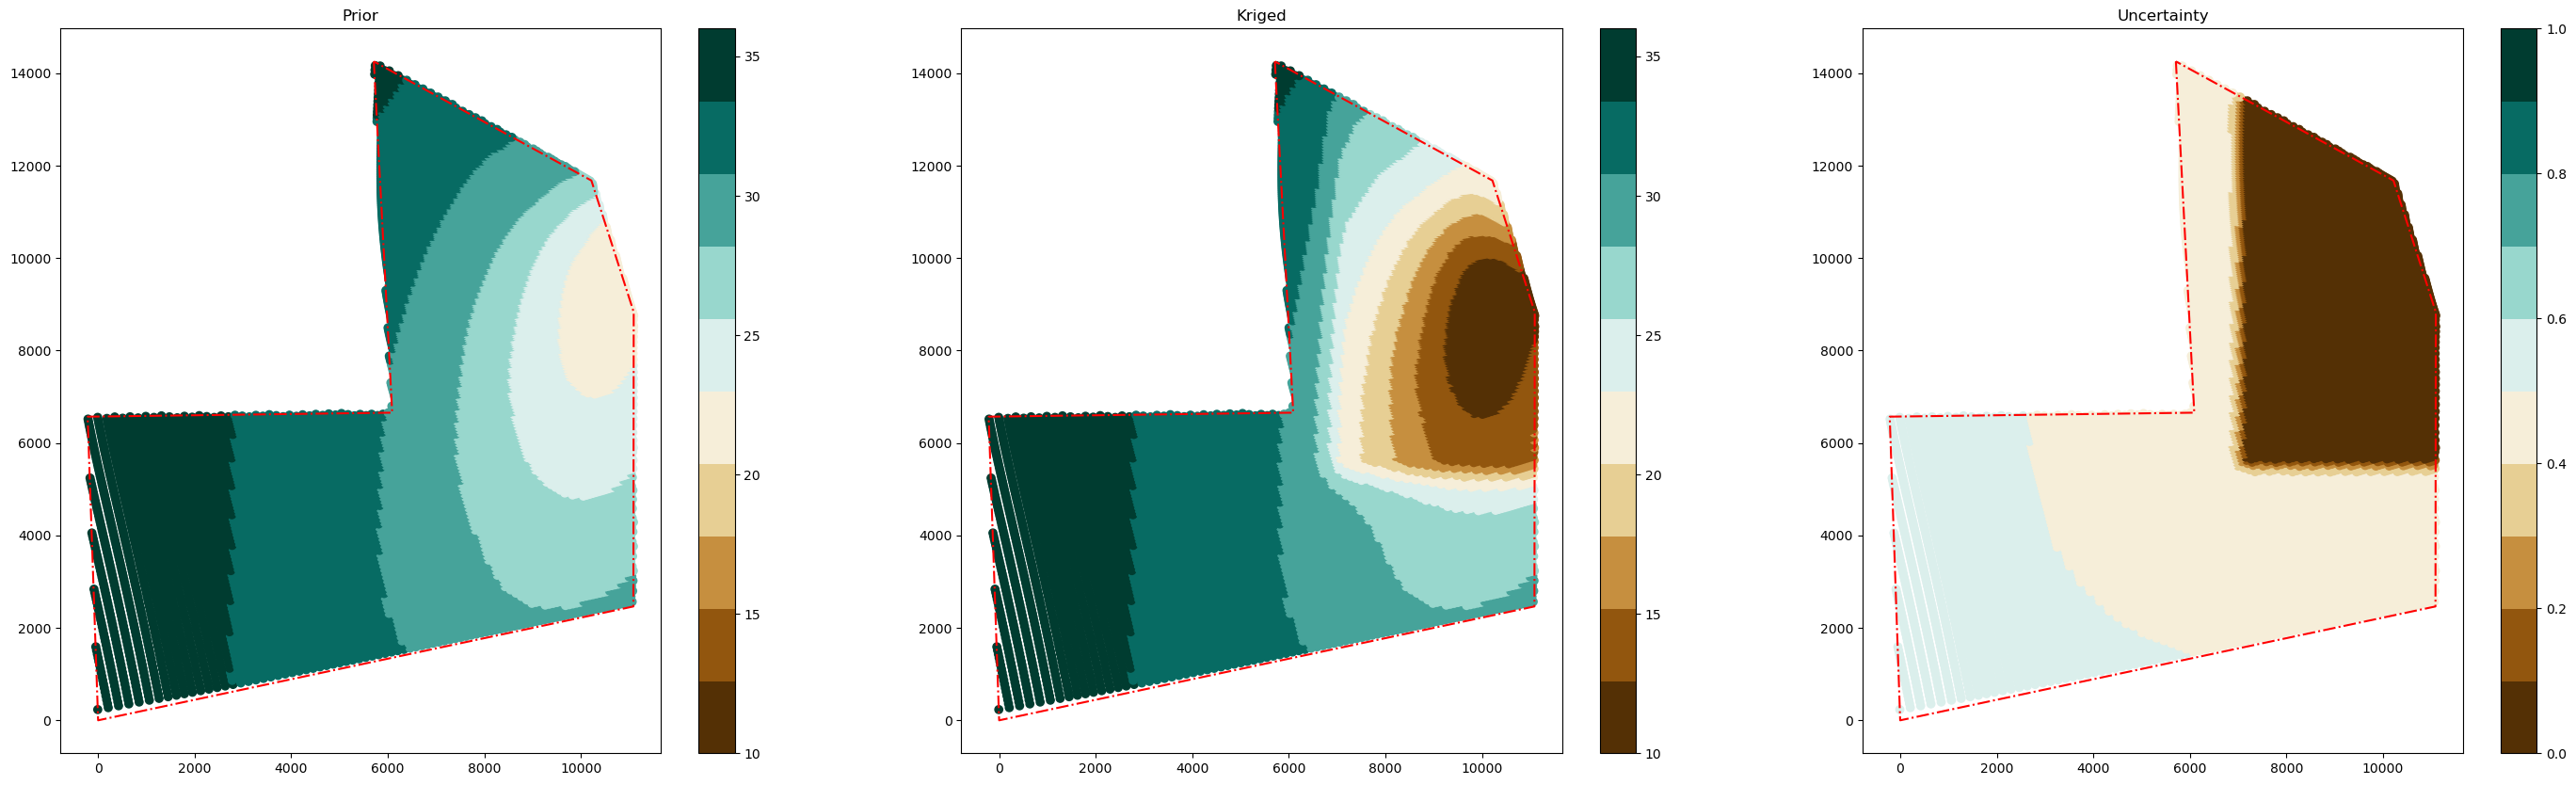

In [42]:

fig = plt.figure(figsize=(35, 10))
gs = GridSpec(nrows=1, ncols=3)
ax = fig.add_subplot(gs[0])
im = ax.scatter(yd, xd, c=sal_d, cmap=get_cmap("BrBG", 10), vmin=10, vmax=36)
ax.plot(yplg, xplg, 'r-.')
plt.colorbar(im)
plt.title("Prior")

ax = fig.add_subplot(gs[1])
im = ax.scatter(yd, xd, c=mu_cond.flatten(), cmap=get_cmap("BrBG", 10), vmin=10, vmax=36)
ax.plot(yplg, xplg, 'r-.')
plt.colorbar(im)
plt.title("Kriged")

ax = fig.add_subplot(gs[2])
im = ax.scatter(yd, xd, c=np.sqrt(np.diag(Sigma_cond)), cmap=get_cmap("BrBG", 10), vmin=0, vmax=1)
ax.plot(yplg, xplg, 'r-.')
plt.colorbar(im)
plt.title("Uncertainty")

plt.savefig("Check.png")
plt.show()



hello


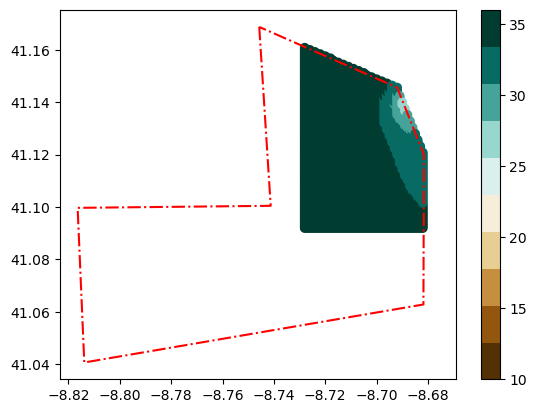

In [95]:
# plt.scatter(lon[ind_legal_mohid], lat[ind_legal_mohid], c=salinity[0, :, :].flatten()[ind_legal_mohid], cmap=get_cmap("BrBG", 10), vmin=10, vmax=36)
plt.scatter(df_mohid[:, 1], df_mohid[:, 0], c=df_mohid[:, 2], cmap=get_cmap("BrBG",10), vmin=10, vmax=36)
plt.plot(plg_op[:, 1], plg_op[:, 0], 'r-.')
plt.colorbar()

# salinity[0, :, :].flatten().shape

## Variogram analysis on Delft3D


[2.99999989e+03 6.47980109e+00 4.68589604e-12]


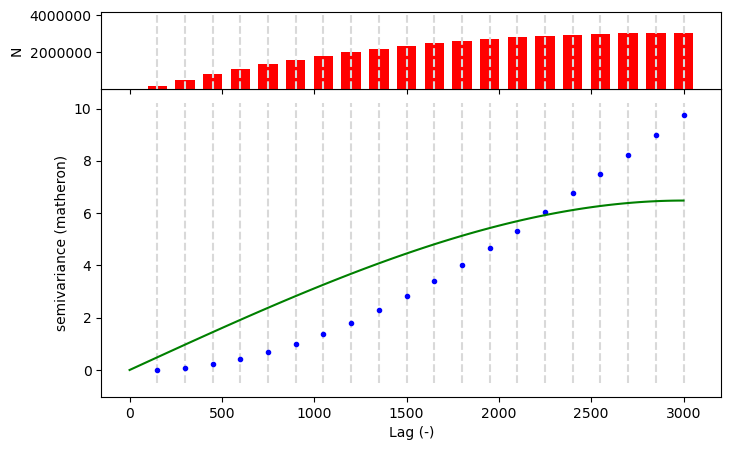

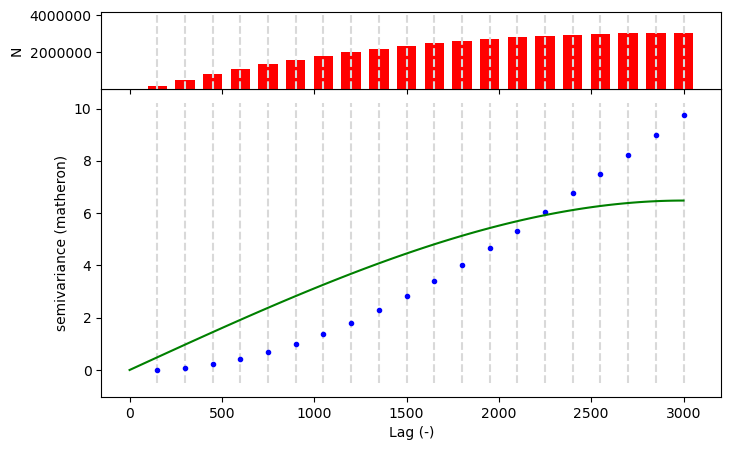

In [3]:
with open('oct_prior.pickle', 'rb') as handle:
    oct_prior = pickle.load(handle)

lat_d = oct_prior['lat']
lon_d = oct_prior['lon']

wind_dir = "North"
wind_level = "Moderate"
sal_d = np.mean(oct_prior[wind_dir][wind_level], axis=0)

lato = 41.04068871469593 
lono = -8.813846858228182
wg = WGS()
wg.set_origin(lato, lono)

xd, yd = wg.latlon2xy(lat_d, lon_d)
residual = sal_d - np.mean(sal_d)
V_v = Variogram(coordinates = np.stack((xd, yd), axis=1), values = residual, n_lags = 20, maxlag = 3000, use_nugget=True)
print(V_v.cof)
V_v.plot()

# t1 = time.time()
# for i in range(salinity.shape[0]):
#     S_sample = salinity[i, :, :, 0].reshape(-1, 1) # sample each frame
#     residual = S_sample - S_f
#     range_coef.append(V_v.cof[0])
#     sill_coef.append(V_v.cof[1])
#     nugget_coef.append(V_v.cof[2])

array([[ 0.0075776 ,  0.01624758,  0.01338523, ..., -0.01892226,
         0.02648826, -0.01413288],
       [ 0.09373202, -0.0962633 , -0.02479612, ..., -0.06835599,
        -0.04741731, -0.03747995],
       [ 0.03134746, -0.04979343,  0.09038498, ..., -0.08781376,
         0.00340212, -0.03608823],
       ...,
       [ 0.05121562, -0.04692499, -0.0175392 , ..., -0.04062975,
        -0.03549127, -0.01264345],
       [ 0.12493197, -0.11836768, -0.02763543, ..., -0.12704906,
        -0.08686455, -0.04694088],
       [ 0.14908743, -0.15813794,  0.06335055, ..., -0.22944536,
        -0.10069885, -0.04673982]])

In [80]:
# check figures
for i in range(len(salinity)):
    plt.figure()
    plt.scatter(lon[ind_close], lat[ind_close], c=salinity[i, :, :].flatten()[ind_close], cmap=get_cmap("BrBG", 10), vmin=10, vmax=35)
    plt.colorbar()
    plt.savefig("fig/mohid/P_{:03d}.png".format(i))
    plt.close("all")

In [4]:
grid = pd.read_csv("grid.csv").to_numpy()
xgrid, ygrid = WGS.latlon2xy(grid[:, 0], grid[:, 1])
xgrid = xgrid.reshape(-1, 1).astype(np.float32)
ygrid = ygrid.reshape(-1, 1).astype(np.float32)
zgrid = grid[:, 2].reshape(-1, 1)

In [5]:
# s0: reduce data first
ind_depth, ind_row, ind_col = np.where((lat <= 41.14) *
                                       (lon <= -8.675) *
                                       (lon >= -8.75))


['grid.csv',
 'Delf3d.ipynb',
 'd.py',
 'data',
 '__pycache__',
 '.ipynb_checkpoints',
 'raw',
 'WGS.py',
 'grid']

In [6]:
# with concurrent.futures.ThreadPoolExecutor(max_workers=1) as executor:
#                             print("Start concurrent")
#                             executor.submit(self.myopic3d_planner.find_next_waypoint_using_min_eibv,
#                                             self.ind_current_waypoint,
#                                             self.ind_previous_waypoint,
#                                             self.ind_visited_waypoint)

def get_data(t=0):
    # s1: loop timestamp
    # t = 1

    # s2: sort depth
    depth_unique = np.nanmean(np.nanmean(depth[:, :, :, t], axis=1), axis=1).reshape(-1, 1)

    # s3: according to depth, select closest layer, then select lat lon
    depth_grid = grid[:, 2].reshape(-1, 1)
    dm_depth = cdist(depth_grid, depth_unique)
    ind_depth = np.argmin(dm_depth, axis=1)

    # s4: then merge them together using reduced dataset
    lat_r = lat[0, ind_row, ind_col]
    lon_r = lon[0, ind_row, ind_col]
    sal_r = sal_data[:, ind_row, ind_col, t]

    xdata, ydata = WGS.latlon2xy(lat_r, lon_r)
    xdata = xdata.reshape(-1, 1).astype(np.float32)
    ydata = ydata.reshape(-1, 1).astype(np.float32)

    sal_total = np.empty([0, 1])

    N = 5000
    shorten = False

    for i in range(0, len(xgrid), N):
        t1 = time.time()
        ind_start = i 
        if i + N > len(xgrid):
            ind_end = len(xgrid)
            shorten = True
        else: 
            ind_end = i + N
#         print(ind_start, ind_end)

        xv = xgrid[ind_start: ind_end].reshape(-1, 1)
        yv = ygrid[ind_start: ind_end].reshape(-1, 1)

        dm_x = cdist(xv, xdata, 'sqeuclidean')
#         print("dm_x: ", dm_x.shape)
        dm_y = cdist(yv, ydata, 'sqeuclidean')
#         print("dm_y: ", dm_y.shape)
        dm = dm_x + dm_y

        ind_min = np.argmin(dm, axis=1)
        if shorten is True:
            n = len(xv)
        else: 
            n = N
        sal_temp = np.zeros([n, 1])
        for j in range(n):
            sal_temp[j] = sal_r[ind_depth[ind_start+j], ind_min[j]]

        sal_total = np.append(sal_total, sal_temp)

        t2 = time.time()
#         print("Time consumed: ", t2 - t1)

    dataset = np.hstack((xgrid, ygrid, zgrid, sal_total.reshape(-1, 1)))
    df = pd.DataFrame(dataset, columns=['x', 'y', 'z', 'salinity'])
    df.to_csv(datapath + "D_{:03d}.csv".format(t))



In [9]:
get_data(0)

/tmp/ipykernel_272480/1194965691.py:13: RuntimeWarning: Mean of empty slice
  depth_unique = np.nanmean(np.nanmean(depth[:, :, :, t], axis=1), axis=1).reshape(-1, 1)


0 5000
dm_x:  (5000, 196066)
dm_y:  (5000, 196066)
Time consumed:  17.756073474884033
5000 10000
dm_x:  (5000, 196066)
dm_y:  (5000, 196066)
Time consumed:  17.396432638168335
10000 15000
dm_x:  (5000, 196066)
dm_y:  (5000, 196066)
Time consumed:  17.863805294036865
15000 20000
dm_x:  (5000, 196066)
dm_y:  (5000, 196066)
Time consumed:  13.580602407455444
20000 25000
dm_x:  (5000, 196066)
dm_y:  (5000, 196066)
Time consumed:  12.306379795074463
25000 30000
dm_x:  (5000, 196066)
dm_y:  (5000, 196066)
Time consumed:  12.168570280075073
30000 35000
dm_x:  (5000, 196066)
dm_y:  (5000, 196066)
Time consumed:  12.54294204711914
35000 40000
dm_x:  (5000, 196066)
dm_y:  (5000, 196066)
Time consumed:  12.295872211456299
40000 45000
dm_x:  (5000, 196066)
dm_y:  (5000, 196066)
Time consumed:  12.317082643508911
45000 50000
dm_x:  (5000, 196066)
dm_y:  (5000, 196066)
Time consumed:  12.28884768486023
50000 54000
dm_x:  (4000, 196066)
dm_y:  (4000, 196066)
Time consumed:  9.774385213851929


In [ ]:
for t in range(164, sal_data.shape[3]):
    print(t)
    t1 = time.time()  
    get_data(t)
    t2 = time.time()
    print("Each timestamp takes: ", t2 - t1)


164


/tmp/ipykernel_276733/227842597.py:13: RuntimeWarning: Mean of empty slice
  depth_unique = np.nanmean(np.nanmean(depth[:, :, :, t], axis=1), axis=1).reshape(-1, 1)


Each timestamp takes:  133.12545084953308
165
Each timestamp takes:  149.34785795211792
166
Each timestamp takes:  131.7678439617157
167
Each timestamp takes:  133.1182346343994
168
Each timestamp takes:  132.17485213279724
169


sh: 1: say: not found


32512

In [40]:
sal_total.shape

(15000,)

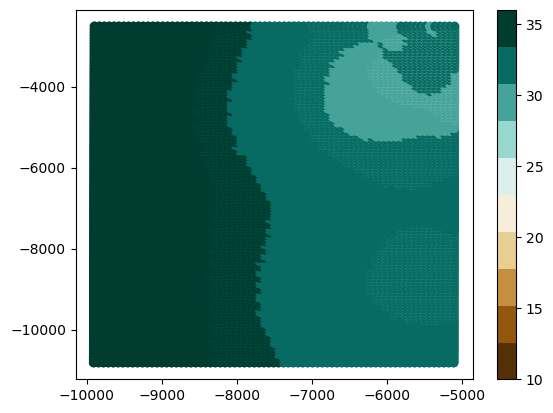

In [30]:
ind_surface = np.where(zgrid >= -.5)[0]
plt.scatter(ygrid[ind_surface], xgrid[ind_surface], c=sal_total[ind_surface].reshape(-1, 1), cmap=get_cmap("BrBG", 10), vmin=10, vmax=36)
plt.colorbar()

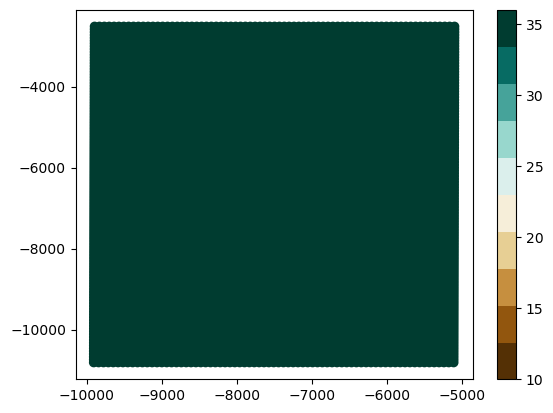

In [31]:
ind_surface = np.where(zgrid == -1.5)[0]
plt.scatter(ygrid[ind_surface], xgrid[ind_surface], c=sal_total[ind_surface].reshape(-1, 1), cmap=get_cmap("BrBG", 10), vmin=10, vmax=36)
plt.colorbar()

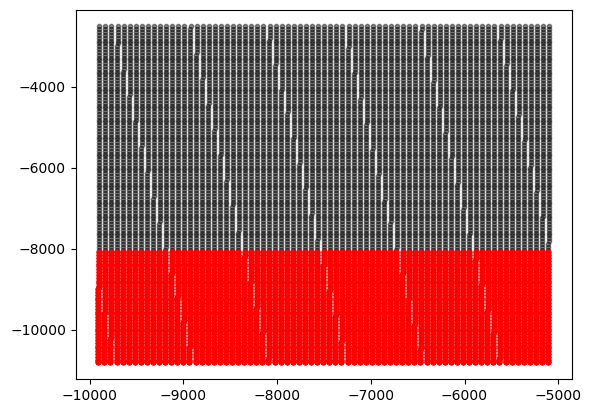

In [42]:
plt.plot(ygrid, xgrid, 'k.', alpha=.1)
plt.plot(ygrid[:3*N], xgrid[:3*N], 'r.')

In [25]:
from WGS import WGS
xgrid, ygrid = WGS.latlon2xy(grid[:, 0], grid[:, 1])
zgrid = grid[:, 2]

t = 0
lat_flatten = lat.flatten()
lon_flatten = lon.flatten()

xdata, ydata = WGS.latlon2xy(lat_flatten, lon_flatten)



In [13]:
@cuda.jit
def distance_matrix(x1, x2, out):
    idx = cuda.grid(1)
    out[idx] = (x1[idx] - x2[idx]) ** 2
    

In [16]:
x = xgrid.astype(np.float32)

In [17]:
xd = cuda.to_device(x)
od = cuda.device_array_like(xd)


In [24]:
threads_per_block = 1024
blocks_per_grid = 512
distance_matrix[blocks_per_grid, threads_per_block](xd, xd, od)


In [27]:
xdata_d = cuda.to_device(xdata.astype(np.float32))
ydata_d = cuda.to_device(ydata.astype(np.float32))
odata_d = cuda.device_array_like(xdata_d)



In [28]:
distance_matrix[blocks_per_grid, threads_per_block](xdata_d, xdata_d, odata_d)


In [ ]:
t1 = np.random.rand(100, 100).astype(np.float32)
t2 = np.random.rand(100, 100).astype(np.float32)

@cuda.jit
def add(x, y, out):
    idx = cuda.grid(1)
    idy = cuda.grid(2)
    out[idx][idy] = x[idx][idy] + y[idx][idy]
